In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

### Second derivatives for model data

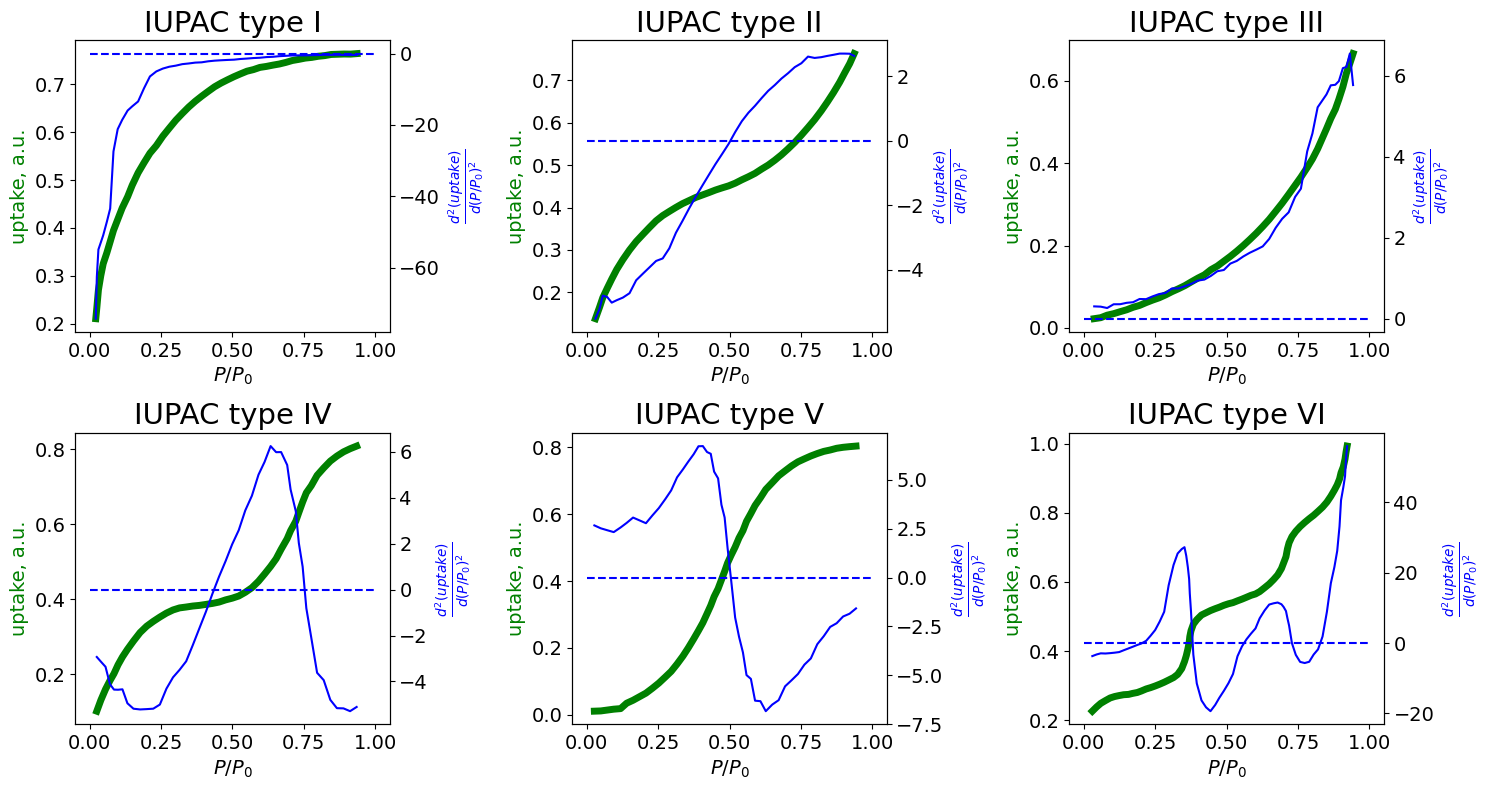

In [2]:
filelist = os.listdir()
filelist = [i for i in filelist if i[-4:]=='.csv']
text_size = 14
ncol = 3
fig, ax = plt.subplots(2,ncol, figsize=( 15, 8))
for i, filename in enumerate(filelist):
    df = pd.read_csv(filename, names=['x', 'y'])
    df = df[df.x>0.02]
    df = df[df.x<0.95]
    ax[i//ncol, i%ncol].plot(df.x, 
             df.y, 
             c='g', 
             label = 'isotherm', linewidth=5)
    #axs[i].legend()
    ax[i//ncol, i%ncol].set_xlabel('$P/P_{0}$', fontsize=text_size)
    ax[i//ncol, i%ncol].set_ylabel('uptake, a.u.', fontsize=text_size, c='g')
    ax[i//ncol, i%ncol].tick_params(axis='x', labelsize=text_size)
    ax[i//ncol, i%ncol].tick_params(axis='y', labelsize=text_size)
    ax[i//ncol, i%ncol].set_title(filename[:-4].replace('type', 'IUPAC type '), fontsize=text_size*1.5)
    ax_deriv = ax[i//ncol, i%ncol].twinx()
    ax_deriv.plot([0, 1],[0, 0], c='b', linestyle='dashed',)    
    deriv = ((df.y.diff()/df.x.diff()).rolling(window=10, min_periods=1, center=True).mean().diff()/df.x.diff()).rolling(window=10, min_periods=1, center=True).mean()
    ax_deriv.plot(df[df.index.isin(deriv.index)].x, 
             deriv,
             c='b', 
             label = 'second derivative')
    #ax_deriv.legend()
    ax_deriv.set_ylabel(r'$\frac{d^{2}(uptake)}{d(P/P_{0})^{2}}$', fontsize=text_size, c='b')
    ax_deriv.tick_params(axis='y', labelsize=text_size)
plt.tight_layout()
plt.savefig('Figure_S104.png', dpi=300)
plt.show()